# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [347]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [351]:
# Import the libraries you will be using for analysis

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [10]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [11]:
!pip install matplotlib==3.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 7.2 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.2
    Uninstalling matplotlib-3.9.2:
      Successfully uninstalled matplotlib-3.9.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [17]:
# Try loading one file

df = pd.read_parquet(r'/Users/karthikmitnala/Documents/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

Ensures representative sampling across different times of day
Captures variations in trip patterns (rush hours, night trips, weekday vs. weekend)
Prevents potential bias from sampling only by hour across all dates

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [61]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'/Users/karthikmitnala/Documents/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

sample_fraction = 0.007
random_state = 42

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        
        # Reading the current file
        print(f"Processing {file_name}")
        current_month_df = pd.read_parquet(file_path)
        
        # Convert pickup datetime to datetime type
        current_month_df['tpep_pickup_datetime'] = pd.to_datetime(current_month_df['tpep_pickup_datetime'])
        
        # We will store the sampled data for the current month in this df
        sampled_data = pd.DataFrame()
        
        # Get unique dates in the dataset
        unique_dates = current_month_df['tpep_pickup_datetime'].dt.date.unique()
        
        # Loop through each unique date
        for current_date in unique_dates:
            # Filter data for the current date
            date_data = current_month_df[current_month_df['tpep_pickup_datetime'].dt.date == current_date]
            
            # Initialize a DataFrame to store sampled data for this date
            date_sampled_data = pd.DataFrame()
            
            # Iterate through each hour of the selected date
            for hour in range(24):
                # Filter data for the current date and hour
                hour_data = date_data[date_data['tpep_pickup_datetime'].dt.hour == hour]
                
                # If there's data for this hour, sample it
                if not hour_data.empty:
                    # Sample 5% of the hourly data randomly
                    hour_sample = hour_data.sample(frac=sample_fraction, random_state=random_state)
                    
                    # Append the sampled hour data to the date's sampled data
                    date_sampled_data = pd.concat([date_sampled_data, hour_sample], ignore_index=True)
            
            # Append the date's sampled data to the month's sampled data
            sampled_data = pd.concat([sampled_data, date_sampled_data], ignore_index=True)
        
        # Concatenate the sampled data of this month to the final dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
        
        print(f"Processed {file_name}. Current total sampled rows: {len(df)}")
    
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processing 2023-12.parquet
Processed 2023-12.parquet. Current total sampled rows: 23352
Processing 2023-6.parquet
Processed 2023-6.parquet. Current total sampled rows: 46162
Processing 2023-7.parquet
Processed 2023-7.parquet. Current total sampled rows: 70525
Processing .DS_Store
Error reading file .DS_Store: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Processing 2023-5.parquet
Processed 2023-5.parquet. Current total sampled rows: 90733
Processing 2023-11.parquet
Processed 2023-11.parquet. Current total sampled rows: 113848
Processing 2023-10.parquet
Processed 2023-10.parquet. Current total sampled rows: 138256
Processing 2023-4.parquet
Processed 2023-4.parquet. Current total sampled rows: 157802
Processing 2023-1.parquet
Processed 2023-1.parquet. Current total sampled rows: 179090
Processing 2023-8.parquet
Processed 2023-8.parquet. Current total sampled rows: 199207
Processing 2023

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [12]:
# Store the df in csv/parquet
df.to_parquet('nyc_taxi_sampled_2023.parquet', index=False)

NameError: name 'df' is not defined

In [65]:
df.to_csv('nyc_taxi_sampled_2023.csv',index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [612]:
# Load the new data file
df = pd.read_parquet(r'/Users/karthikmitnala/Documents/Datasets and Dictionary/trip_records/nyc_taxi_sampled_2023.parquet')

In [614]:
df['tpep_pickup_datetime'].head()

0   2023-12-01 00:27:51
1   2023-12-01 00:38:48
2   2023-12-01 00:06:19
3   2023-12-01 00:00:50
4   2023-12-01 00:16:07
Name: tpep_pickup_datetime, dtype: datetime64[us]

In [616]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
265482,2,2023-06-30 23:53:42,2023-07-01 00:15:29,2.0,3.59,1.0,N,231,256,1,23.3,1.0,0.5,2.70,0.0,1.0,31.00,2.5,0.0,NaN
265483,2,2023-06-30 23:05:53,2023-06-30 23:12:25,2.0,1.09,1.0,N,179,179,2,7.9,1.0,0.5,0.00,0.0,1.0,12.90,2.5,0.0,NaN
265484,1,2023-06-30 23:32:05,2023-06-30 23:45:24,1.0,2.20,1.0,N,232,170,1,14.9,3.5,0.5,4.95,0.0,1.0,24.85,2.5,0.0,NaN
265485,1,2023-06-30 23:28:03,2023-07-01 00:10:39,1.0,6.50,1.0,N,230,97,1,41.5,3.5,0.5,9.30,0.0,1.0,55.80,2.5,0.0,NaN
265486,2,2023-06-30 23:15:04,2023-06-30 23:24:59,1.0,1.08,1.0,N,114,79,1,10.0,1.0,0.5,3.00,0.0,1.0,18.00,2.5,0.0,NaN


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [618]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
# not able to make any unncessary columns at this moment 

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [620]:
# Combine the two airport fee columns
# Combine the two columns into one
df['Airport_fee_combined'] = df['Airport_fee'].fillna(df['airport_fee'])

# Drop the original airport fee columns
df = df.drop(['Airport_fee', 'airport_fee'], axis=1)

# Rename the combined column
df = df.rename(columns={'Airport_fee_combined': 'Airport_fee'})

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [622]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [666]:
# Analyse RatecodeID for the negative fare amounts

(df['RatecodeID']<0).sum()

0

In [626]:
# Find which columns have negative values
# Get columns that are numeric (automatically excludes datetime columns)
numeric_df = df.select_dtypes(include=['number'])

# Get the counts of negative values in the df 
(numeric_df < 0).sum()


VendorID                  0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     1
mta_tax                  11
tip_amount                0
tolls_amount              0
improvement_surcharge    11
total_amount             11
congestion_surcharge      6
Airport_fee               2
dtype: int64

In [628]:
# fix these negative values
#Going through each column to see what the negative value means and replacing with appropriate value 
df[df['extra'] < 0]
# Since Extra cannot be negative, as per definition replacing it with mode to not lose data  
df.loc[df['extra'] < 0, 'extra'] = df['extra'].mode()[0]

In [668]:
# Doing similar analysis for other coluns , mta_tax 
df['mta_tax'].value_counts()
# I think i can safely replace by mode here as well

df.loc[df['mta_tax'] < 0, 'mta_tax'] = df['mta_tax'].mode()[0]

df['mta_tax'].value_counts()

mta_tax
0.50    263001
0.00      2462
0.80         9
0.05         4
Name: count, dtype: int64

In [670]:
#improvement surcharge, started being levied in 2015 - for data of 2023, it should have been there 0.30 USD 
df['improvement_surcharge'].value_counts()
# Here also replacing with mode as it is most common value 
df.loc[df['improvement_surcharge'] < 0, 'improvement_surcharge'] = df['improvement_surcharge'].mode()[0]

In [672]:
#total_amount seems to be the final amount charged to customer, better to drop these rows instead of imputing as it is a 
#final variable and the data is less as well

# so retaining only those rows 

df = df[df['total_amount'] >= 0]


In [674]:
# congestion charge - since, we removed the entries of total amount having negative charge, 
# congestion surcharge got taken care automatically in that 

df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    236938
0.0     19707
Name: count, dtype: int64

Both congestion surcharge and the aiport fee - got taken care of automatically from the above operation of removing those rows with negative values - the values are very less in comparison and doesnt affect our data operations 

In [676]:
df['Airport_fee'].value_counts()

Airport_fee
0.00    234041
1.75     16911
1.25      5693
Name: count, dtype: int64

In [678]:
numeric_df = df.select_dtypes(include=['number'])

# Get the counts of negative values in the df 
(numeric_df < 0).sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [642]:
# Find the proportion of missing values in each column

missing_data = (100* df.isnull().sum()/df.shape[0]).reset_index()

missing_data.rename(columns = {"index":"column_name",0:"% missing"},inplace = True)


Missing Data by columns 

In [680]:
missing_data

,column_name,% missing
0,VendorID,0.000000
1,tpep_pickup_datetime,0.000000
2,tpep_dropoff_datetime,0.000000
3,passenger_count,3.326478
4,trip_distance,0.000000
5,RatecodeID,3.326478
6,store_and_fwd_flag,3.326478
7,PULocationID,0.000000
8,DOLocationID,0.000000
9,payment_type,0.000000


Retaining only the columns with missing data > 0 

In [682]:
missing_data[missing_data['% missing']>0]

,column_name,% missing
3,passenger_count,3.326478
5,RatecodeID,3.326478
6,store_and_fwd_flag,3.326478
17,congestion_surcharge,3.326478
18,Airport_fee,3.326478


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [684]:
# Display the rows with null values
df[df['passenger_count'].isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee


In [686]:
df['passenger_count'].isnull().sum()

0

In [688]:
# Impute NaN values in 'passenger_count'
df['passenger_count'].value_counts()

passenger_count
1.0    202221
2.0     38666
3.0      9640
4.0      5340
0.0      4070
5.0      3300
6.0      2234
7.0         2
8.0         2
9.0         1
Name: count, dtype: int64

The data is highly skewed and is tending towards a value 1 , it is safe to impute with the mode for the missing values as well 

In [690]:
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace = True)

In [692]:
df['passenger_count'].isnull().sum()

0

Did you find zeroes in passenger_count? Handle these.

Didn't find zeros for passenger count 

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [740]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isnull().sum()

0

In [742]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    251014
2.0     10076
5.0      1423
3.0       845
4.0       519
Name: count, dtype: int64

This also seems like a variable with a skew towards one value - hence going for same approach 

In [662]:
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace = True)

In [664]:
df['RatecodeID'].isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [744]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isnull().sum()

8767

In [746]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    236936
0.0     18174
Name: count, dtype: int64

Though integer variable there are two values and we can go for similar approach 

In [748]:
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0], inplace = True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

Store and fwd , airport fee have missing data  

In [750]:
# Handle any remaining missing values
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    262368
Y      1509
Name: count, dtype: int64

In [752]:
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace = True)

In [754]:
df['Airport_fee'].isnull().sum()

0

In [756]:
df['Airport_fee'].value_counts()

Airport_fee
0.00    241273
1.75     16911
1.25      5693
Name: count, dtype: int64

In [758]:
df['Airport_fee'].fillna(df['Airport_fee'].mode()[0], inplace = True)

Checking missing data in all columns and showing the percentage

In [762]:
missing_data = (100* df.isnull().sum()/df.shape[0]).reset_index()

missing_data.rename(columns = {"index":"column_name",0:"% missing"},inplace = True)

In [764]:
missing_data

,column_name,% missing
0,VendorID,0.0
1,tpep_pickup_datetime,0.0
2,tpep_dropoff_datetime,0.0
3,passenger_count,0.0
4,trip_distance,0.0
5,RatecodeID,0.0
6,store_and_fwd_flag,0.0
7,PULocationID,0.0
8,DOLocationID,0.0
9,payment_type,0.0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.info()

 tpep_pickup_datetime, tpep_dropoff_datetime - Are columns which wont have outliers and verified

In [717]:
df['VendorID'].value_counts()

VendorID
2    194397
1     71015
6        64
Name: count, dtype: int64

In [ ]:
# Vendor ID 6 is invalid, we could either remove them or impute - as this seems to be wrong entry, hence removing them as they are very less 

In [719]:
df = df[~(df.VendorID == 6)]

Rate code cannot have 99 as value as it has fixed values as given in dictionary removing it as impact is very less 

In [725]:
df = df[~(df.RatecodeID == 99)]

In [727]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    251014
2.0     10076
5.0      1428
3.0       845
4.0       519
Name: count, dtype: int64

In [465]:
df['passenger_count'].value_counts()

passenger_count
1.0    202157
2.0     38666
3.0      9640
4.0      5340
0.0      4070
5.0      3300
6.0      2234
7.0         2
8.0         2
9.0         1
Name: count, dtype: int64

In [ ]:
Removing 7,8,9 counts as they have less values and not very useful for any analysis

In [735]:
df = df [~(df.passenger_count >= 7)]

df.shape

(263877, 19)

In [469]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    263902
Y      1510
Name: count, dtype: int64

In [766]:
df['trip_distance'].describe()

count    263877.000000
mean          3.562729
std          48.741196
min           0.000000
25%           1.050000
50%           1.790000
75%           3.380000
max       22528.820000
Name: trip_distance, dtype: float64

Checked Mean, median, mode - all are less - but there seems to be big outliers which are skewing the max value 

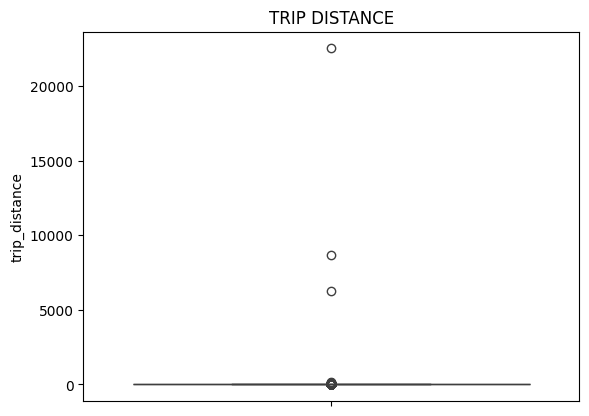

In [768]:
sns.boxplot(df.trip_distance)
plt.title('TRIP DISTANCE')
plt.show()

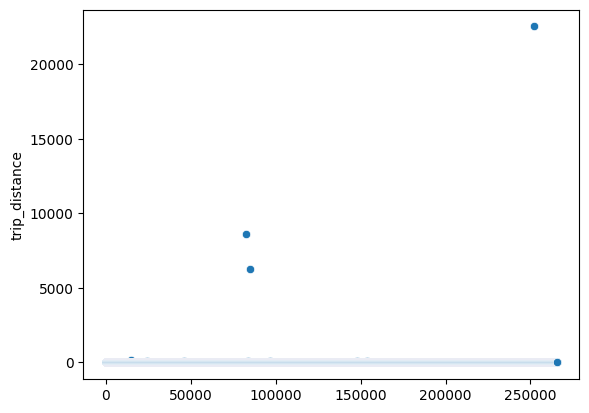

In [770]:
sns.scatterplot(df.trip_distance)

plt.show()

In [779]:
(df[df.trip_distance == 0].trip_distance.count()/df.shape[0])*100

1.9353714041011532

In [ ]:
#2% of values have trip_distance as 0 , is the fare also zero for these  - need to check 

In [781]:
#Lets see scatter plot of fare and distance 

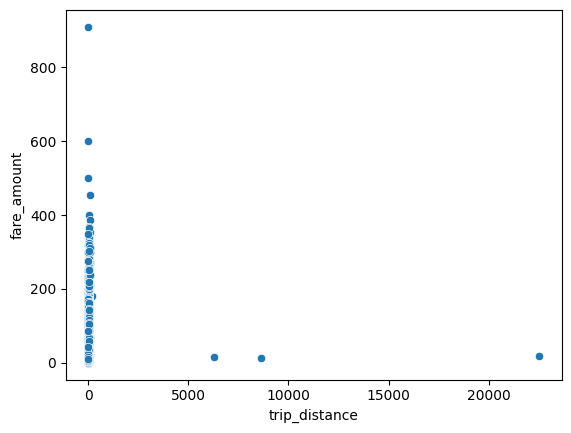

In [783]:
sns.scatterplot(x = 'trip_distance', y = 'fare_amount', data = df)
plt.show()

In [ ]:
# clearly some distances - are increasing and fare is not , lets remove clear outliers in distance - 3 observations greater than 5000 and see 

In [791]:
df = df[~(df.trip_distance>=5000)]

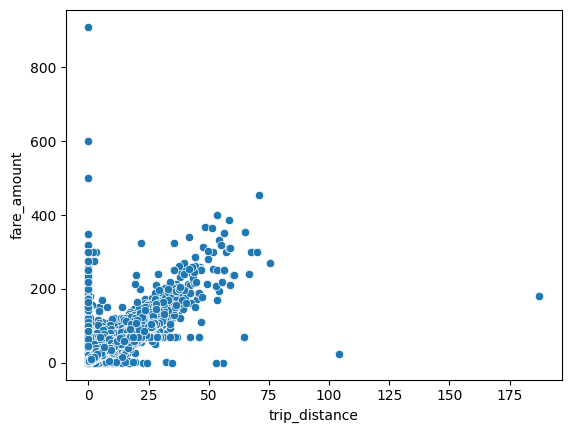

In [793]:
sns.scatterplot(x = 'trip_distance', y = 'fare_amount', data = df)
plt.show()

Some Trip fares near zero seem to have high fare_amount lets try to elimiate them as they seem to be outliers for that lets see fare distribution also 

In [795]:
df.fare_amount.describe()

count    263874.000000
mean         19.746778
std          18.186973
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         910.000000
Name: fare_amount, dtype: float64

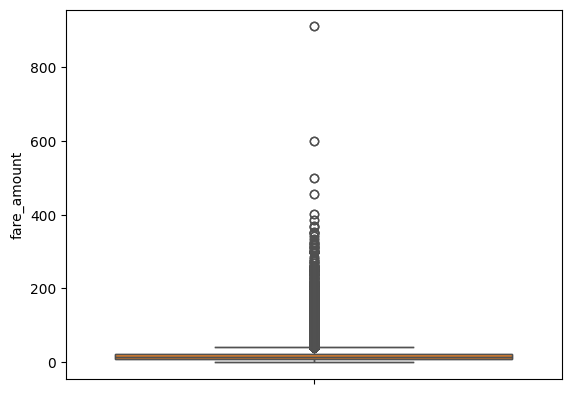

In [801]:
sns.boxplot(df.fare_amount)
plt.show()

Some outliers are there in fare amount as well, 0 fare is min and max is 910 - why is there a 0 fare is distance 0 as well

In [823]:
 df[(df.trip_distance ==0) & (df.fare_amount == 0)].shape

(34, 19)

34 values have both fare and distance 0,  

out of these Pickup and drop location are not same for 3 values these can be removed 

In [821]:
df = df[~((df.trip_distance ==0) & (df.fare_amount == 0) & (df.PULocationID != df.DOLocationID))].shape

(263871, 19)

Lets look at scatter plot again 

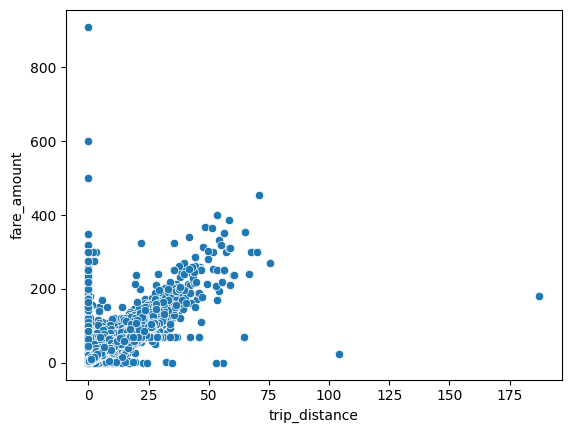

In [825]:
sns.scatterplot(x = 'trip_distance', y = 'fare_amount', data = df)
plt.show()

Distances almost tending to 0 seem to have high fare - so lets remove 

distance < 0.1 and fare > 300 

In [833]:
df = df[~((df.trip_distance < 0.1) & (df.fare_amount >300))]

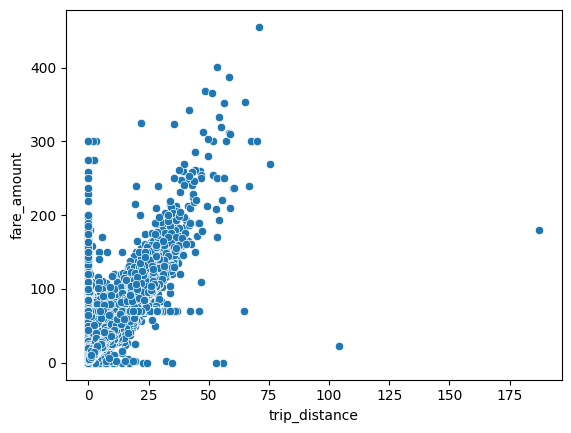

In [835]:
sns.scatterplot(x = 'trip_distance', y = 'fare_amount', data = df)
plt.show()

Trip distance 0 itself seems doubtful as it may not occur - so checking how many values have 0 distance but more than 0 fare and removing

In [852]:
df[(df.trip_distance == 0) & (df.fare_amount > 0)].shape[0]/df.shape[0] * 100

1.9206500195172604

All of above seems suspious and removing 

In [856]:
df = df[~((df.trip_distance == 0) & (df.fare_amount > 0))]

Now checking scatter plot 

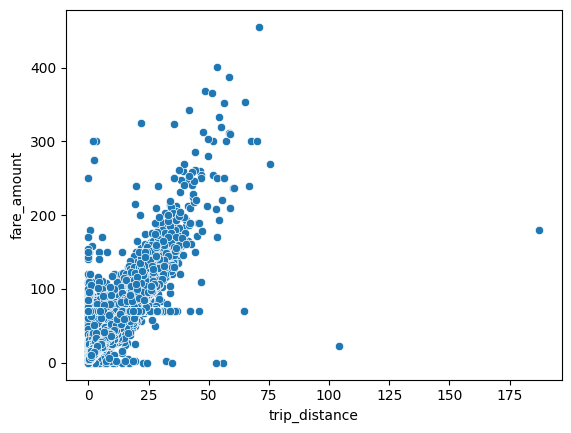

In [858]:
sns.scatterplot(x = 'trip_distance', y = 'fare_amount', data = df)
plt.show()

In [860]:
df.trip_distance.describe()

count    258801.000000
mean          3.487866
std           4.525803
min           0.000000
25%           1.100000
50%           1.800000
75%           3.430000
max         187.350000
Name: trip_distance, dtype: float64

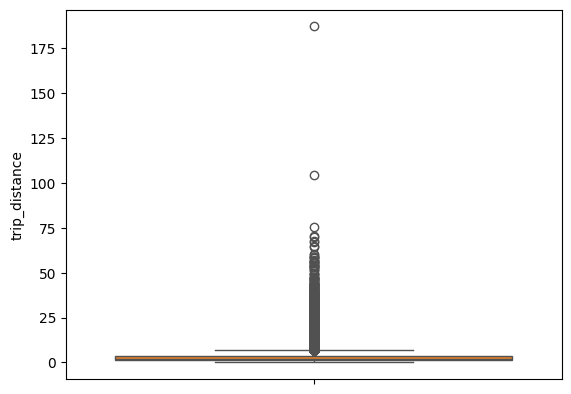

In [877]:
sns.boxplot(df.trip_distance) 
plt.show()

In [889]:
df[df.trip_distance > 100]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
14900,2,2023-12-18 10:52:49,2023-12-18 13:40:43,1.0,187.35,5.0,N,246,265,1,180.0,0.0,0.0,0.15,12.75,1.0,193.90,0.0,0.0
153801,2,2023-08-25 14:29:44,2023-08-25 14:54:07,1.0,104.30,1.0,N,43,170,1,23.3,0.0,0.5,2.73,0.00,1.0,30.03,2.5,0.0


Entries have less fare than maxmimum and seem to be outliers, we can remove or impute, better to remove as they are less 

In [907]:
df = df[~(df.trip_distance > 100)]

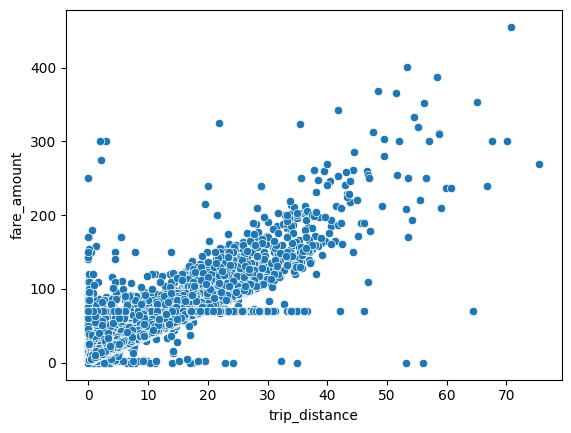

In [909]:
sns.scatterplot(x = 'trip_distance', y = 'fare_amount', data = df)
plt.show()

In [913]:
df.trip_distance.describe()

count    252118.000000
mean          3.462209
std           4.509543
min           0.000000
25%           1.080000
50%           1.800000
75%           3.380000
max          75.500000
Name: trip_distance, dtype: float64

In [915]:
df.fare_amount.describe()

count    252118.000000
mean         19.528155
std          17.746909
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         455.200000
Name: fare_amount, dtype: float64

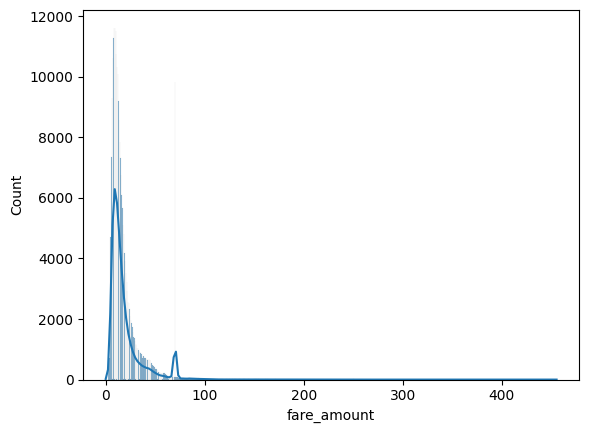

In [917]:
sns.histplot(df.fare_amount, kde=True) 
plt.show()

In [ ]:
#The fare and trip_distance more or less look ok - now 

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

Used above guidlines to delete entries - that didn;t make sense as in above 

In [893]:
df.payment_type.value_counts()

payment_type
1    205886
2     43581
0      6681
4      1715
3       938
Name: count, dtype: int64

Payment type cannot be 0 removed entries 

In [901]:
df  = df[~(df.payment_type == 0)]

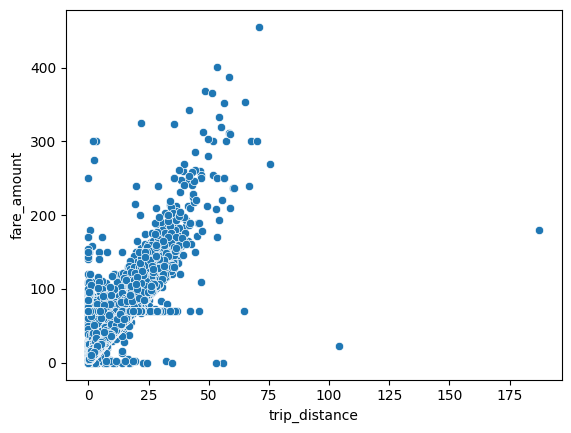

In [903]:
sns.scatterplot(x = 'trip_distance', y = 'fare_amount', data = df)
plt.show()

How will you fix each of these values? Which ones will you drop and which ones will you replace?

In [919]:
# Do any columns need standardising?

# The columns tip_amount and total_amount doesn't have much relevance as fare amount is the main one -> they might be removed / I dont think any thing needs standardisation

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,252118.000000,252118,252118,252118.000000,252118.000000,252118.000000,252118.000000,252118.000000,252118.000000,252118.000000,252118.000000,252118.000000,252118.000000,252118.000000,252118.000000,252118.000000,252118.000000,252118.000000
mean,1.742002,2023-07-01 19:54:17.176738,2023-07-01 20:11:33.494149,1.370168,3.462209,1.061888,165.558469,164.372877,1.200708,19.528155,1.654595,0.496825,3.600558,0.587044,0.999574,28.709959,2.335186,0.143718
min,1.000000,2023-01-01 00:04:34,2023-01-01 00:17:32,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2023-04-01 20:54:48.250000,2023-04-01 21:07:02.750000,1.000000,1.080000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000
50%,2.000000,2023-06-25 22:14:56,2023-06-25 22:30:12,1.000000,1.800000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.880000,0.000000,1.000000,21.000000,2.500000,0.000000
75%,2.000000,2023-10-05 19:13:40.500000,2023-10-05 19:29:04.250000,1.000000,3.380000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.480000,0.000000,1.000000,30.550000,2.500000,0.000000
max,2.000000,2023-12-31 23:54:03,2024-01-01 20:14:57,6.000000,75.500000,5.000000,265.000000,265.000000,4.000000,455.200000,14.250000,0.800000,150.290000,50.000000,1.000000,488.700000,2.500000,1.750000
std,0.437534,NaN,NaN,0.892981,4.509543,0.329157,63.569789,69.614036,0.456815,17.746909,1.833791,0.039823,4.014650,2.145205,0.018293,22.469869,0.620381,0.465756


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [921]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [926]:
# Categories of variables

variable_categories = {
    'Numerical': [
        'trip_distance',      # Continuous distance in miles
        'trip_duration',      # Continuous time measurement
    ],
    'Categorical': [
        'VendorID',          # Discrete identifier (1 or 2)
        'RatecodeID',        # Discrete code for rate type
        'PULocationID',      # Discrete location identifier
        'DOLocationID',      # Discrete location identifier
        'payment_type',      # Discrete payment method code
    ],
    'Datetime': [
        'tpep_pickup_datetime',   # Date and time
        'tpep_dropoff_datetime',  # Date and time
    ],
    'Ordinal/Discrete': [
        'passenger_count',    # Count of passengers (discrete but ordered)
        'pickup_hour',        # Hour of day (0-23, discrete but cyclical)
    ]
}

fare_amount - Continuous dollar amount
extra - Dollar amount for surcharges
mta_tax - Dollar amount for tax
tip_amount - Continuous dollar amount
tolls_amount - Dollar amount for tolls
improvement_surcharge - Dollar amount for surcharge
total_amount - Continuous dollar amount
congestion_surcharge - Dollar amount for surcharge
airport_fee - Dollar amount for fee

#While some of these might have fixed values in certain cases (like mta_tax being $0.50), 
#they're still mathematical quantities that can be used in calculations, and are therefore numerical variables rather than categorical.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [930]:
df.tpep_pickup_datetime.tail()

265482   2023-06-30 23:53:42
265483   2023-06-30 23:05:53
265484   2023-06-30 23:32:05
265485   2023-06-30 23:28:03
265486   2023-06-30 23:15:04
Name: tpep_pickup_datetime, dtype: datetime64[us]

In [932]:
# Convert the datetime columns to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract components
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_minute'] = df['tpep_pickup_datetime'].dt.minute
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday  # 0 = Monday, 6 = Sunday

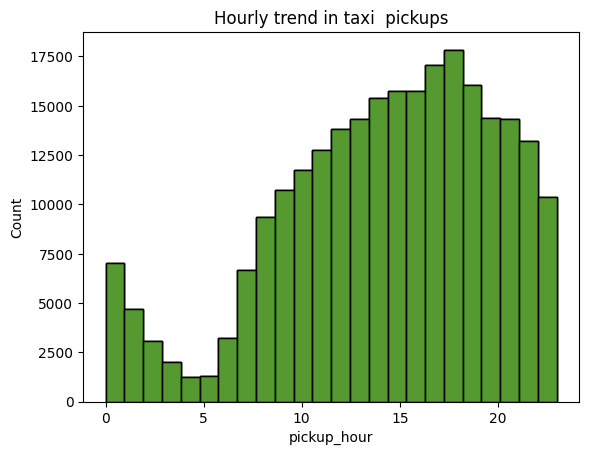

In [970]:
# Find and show the hourly trends in taxi pickups
sns.histplot(df.pickup_hour, bins = 24)
plt.title('Hourly trend in taxi  pickups')
plt.show()

In [974]:
(df.pickup_hour.value_counts(normalize = True) * 100).sort_values(ascending = False)

pickup_hour
18    7.080018
17    6.762310
19    6.364480
15    6.245488
16    6.239539
14    6.105078
20    5.704075
13    5.688606
21    5.678690
12    5.490286
22    5.238420
11    5.055966
10    4.649014
9     4.249201
23    4.112757
8     3.703821
0     2.797103
7     2.651933
1     1.872139
6     1.281939
2     1.226806
3     0.794469
5     0.505716
4     0.502146
Name: proportion, dtype: float64

Using distplot to see the visualise better for the pickup hour

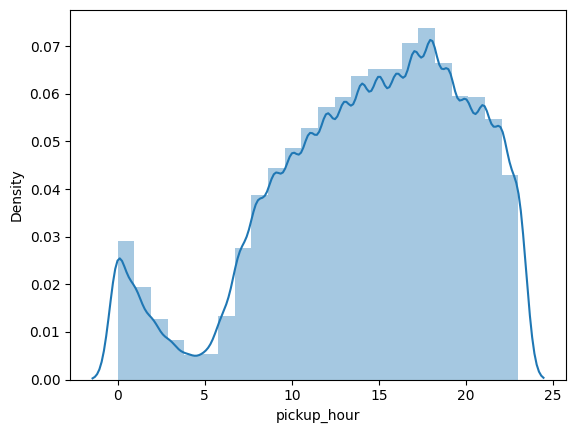

In [986]:
sns.distplot(df.pickup_hour, bins = 24)
plt.show()

In [ ]:
# Each Weekday have same/ similar pickup trend, with max on wed, Thursday

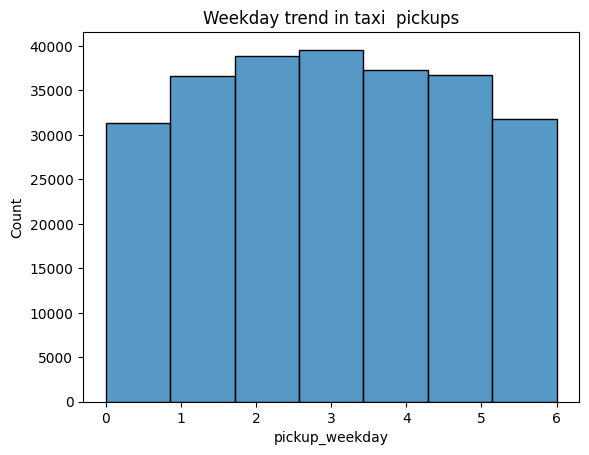

In [1024]:
# Find and show the daily trends in taxi pickups (days of the week)


sns.histplot(df.pickup_weekday, bins = 7)
plt.title('Weekday trend in taxi  pickups')
plt.show()

The trend is similar month over month, with no major dips - data is balanced

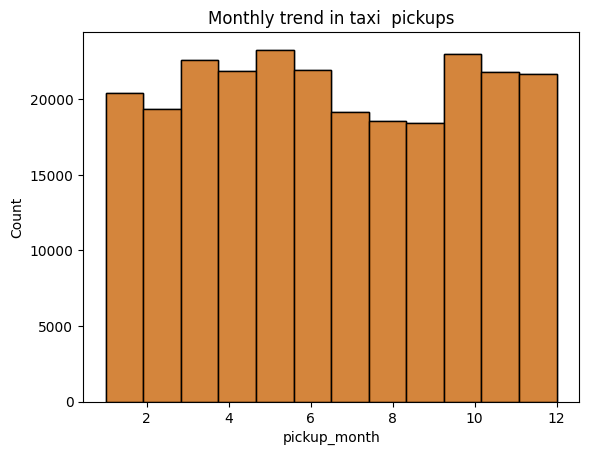

In [990]:
# Show the monthly trends in pickups
sns.histplot(df.pickup_month, bins = 12)
plt.title('Monthly trend in taxi  pickups')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [998]:
# Analyse the above parameters
df[df.fare_amount ==0].shape[0]

75

Fare Amount Contains 75 0 values

Fare Amount 0 can be a factor of customers paying by credit or customers having payment type no charge, let us leave it as is and moving on

In [1004]:
df[df.tip_amount == 0].shape[0]

54060

In [ ]:
Customers may decide to tip or not, having 0 vaules shouldnt impact our analysis 

In [ ]:
Total amount is also similar 

In [ ]:
Trip_Distance doesnt make sense if it is 0 , so i have removed them earlier during analysis 

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
There is no need to create a copy, as i have handled them before.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

# current data frame has nonzero entry of distance

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

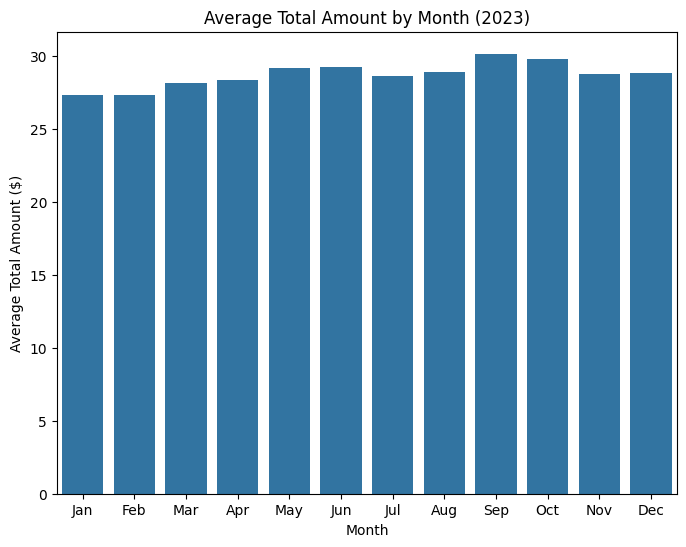

In [1044]:
# Group data by month and analyse monthly revenue


monthly_avg = df.total_amount.groupby(df.pickup_month).mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='pickup_month', y='total_amount', data=monthly_avg)

# Add labels and title
plt.title('Average Total Amount by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Average Total Amount ($)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

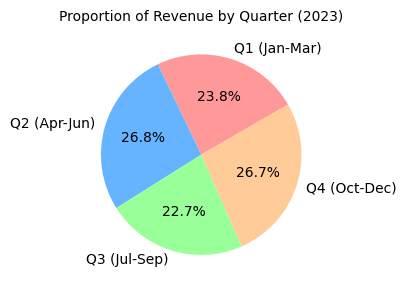

In [1042]:
# Calculate proportion of each quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter

# Map quarters to labels
quarter_labels = {1: 'Q1 (Jan-Mar)', 2: 'Q2 (Apr-Jun)', 
                  3: 'Q3 (Jul-Sep)', 4: 'Q4 (Oct-Dec)'}
df['quarter_label'] = df['quarter'].map(quarter_labels)

# Calculate total revenue by quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()

# Calculate the proportion of each quarter
total_revenue = quarterly_revenue.sum()
revenue_proportion = quarterly_revenue / total_revenue * 100

# Create a pie chart
plt.figure(figsize=(6, 3))
plt.pie(revenue_proportion, labels=[quarter_labels[q] for q in quarterly_revenue.index],
        autopct='%1.1f%%', startangle=30, shadow=False, 
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Add title
plt.title('Proportion of Revenue by Quarter (2023)', fontsize=10)


plt.tight_layout()
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

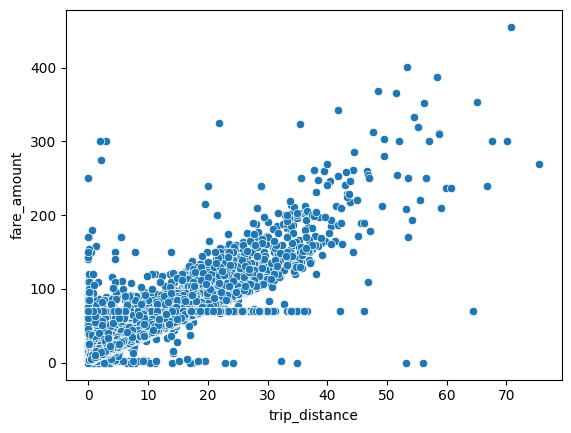

In [1053]:
# Show how trip fare is affected by distance
# Removed trip_distance = 0 already in data
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [1057]:
# Convert the datetime columns to datetime type
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract components
df['dropoff_month'] = df['tpep_dropoff_datetime'].dt.month
df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.day
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['dropoff_minute'] = df['tpep_dropoff_datetime'].dt.minute
df['dropoff_weekday'] = df['tpep_dropoff_datetime'].dt.weekday  # 0 = Monday, 6 = Sunday

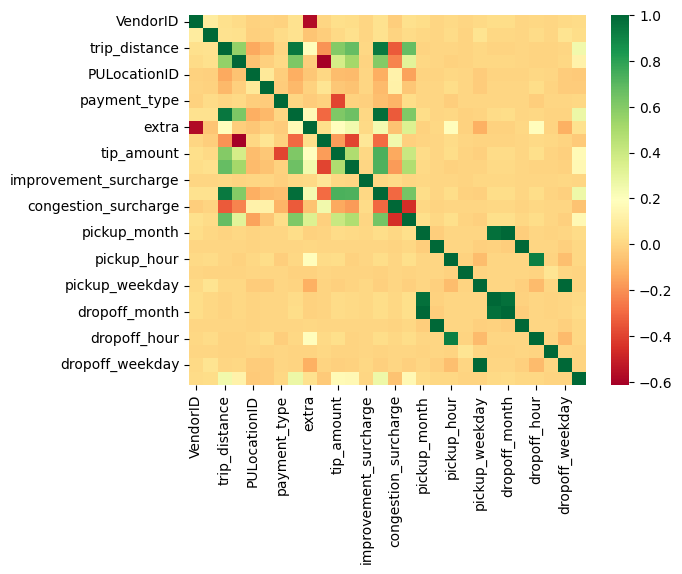

In [1094]:
# heat map
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap ="RdYlGn")
plt.show()

In [1059]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [1061]:
correlation = df['fare_amount'].corr(df['trip_duration_minutes'])

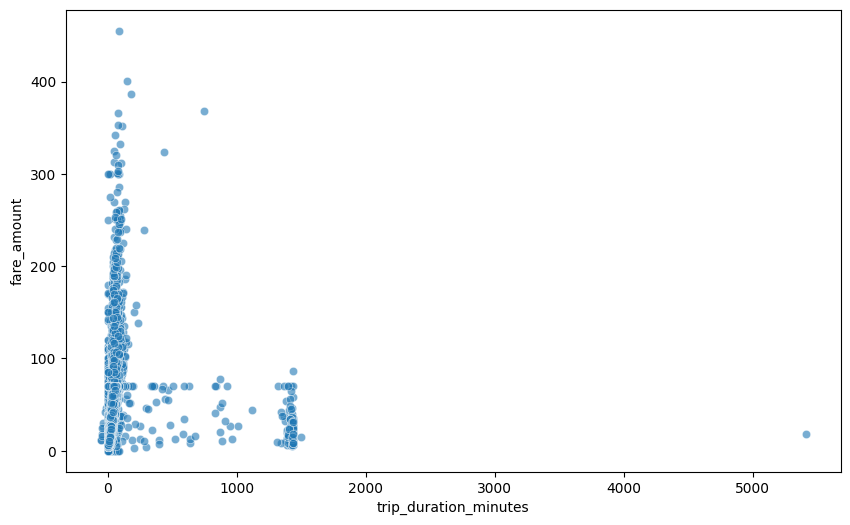

In [1084]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration_minutes', y='fare_amount', data=df, alpha=0.6)
plt.show()

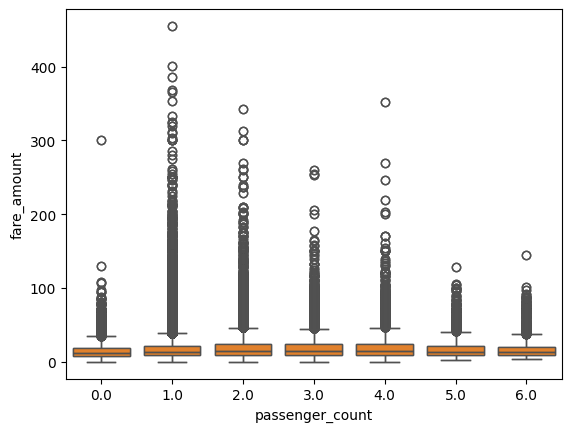

In [1100]:
# Show relationship between fare and number of passengers

sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.show()

## The fare has similar values and doesn't change drastically with passengers 

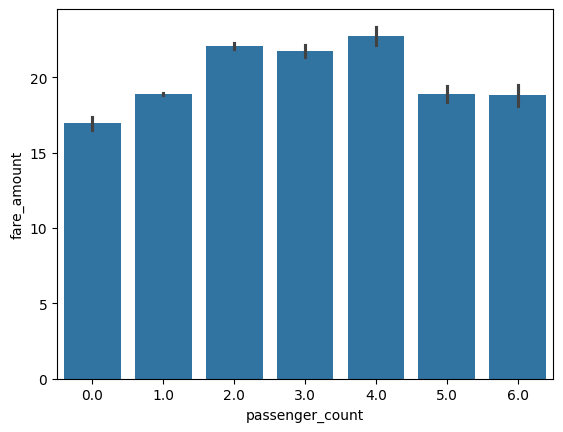

In [1104]:
sns.barplot(x='passenger_count', y='fare_amount', data=df)
plt.show()

## Visualising same with barplot

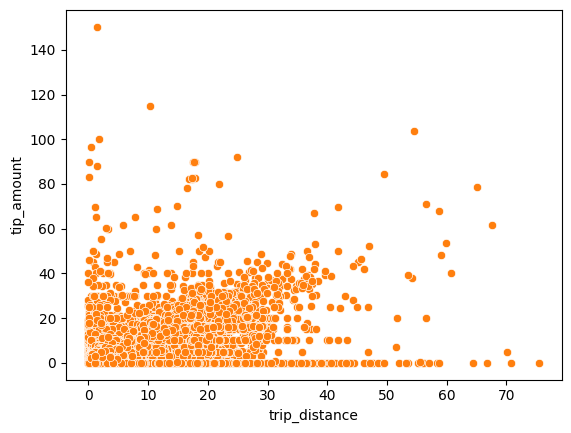

In [1114]:
# Show relationship between tip and trip distance
sns.scatterplot(x='trip_distance', y='tip_amount', data=df)
plt.show()

# not exactly linear relation - little complex to explain the relation

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [1118]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df['payment_type'].value_counts()

payment_counts


payment_type
1    205884
2     43581
4      1715
3       938
Name: count, dtype: int64

In [1122]:
payment_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Create a new Series with labeled indices
labeled_counts = payment_counts.copy()
labeled_counts.index = [payment_labels.get(idx, f'Type {idx}') for idx in labeled_counts.index]

# Calculate percentages
payment_percentages = 100 * labeled_counts / labeled_counts.sum()



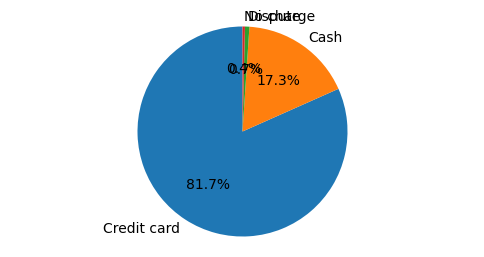

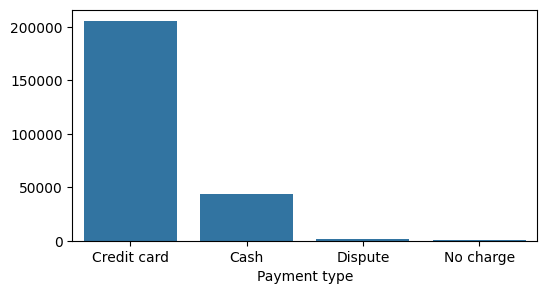

In [1138]:
# Create a pie chart
plt.figure(figsize=(6, 3))
plt.pie(labeled_counts, labels=labeled_counts.index, autopct='%1.1f%%', 
        startangle=90, shadow=False)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create a bar chart for another view
plt.figure(figsize=(6, 3))
sns.barplot(x=labeled_counts.index, y=labeled_counts.values)
plt.xlabel('Payment type')
plt.show()

Credit card is the most used payment type

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [1148]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.9 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [1150]:
import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file(r'/Users/karthikmitnala/Documents/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [1154]:
print(zones.info())
zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [1156]:
# Merge zones and trip records using locationID and PULocationID

merged_df = df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [1160]:
# Group data by location and calculate the number of trips

trips_by_location = merged_df.groupby(['PULocationID', 'zone']).size().reset_index(name='trip_count')

trips_by_location

,PULocationID,zone,trip_count
0,1,Newark Airport,5
1,4,Alphabet City,238
2,6,Arrochar/Fort Wadsworth,3
3,7,Astoria,93
4,9,Auburndale,1
...,...,...,...
179,258,Woodhaven,1
180,260,Woodside,33
181,261,World Trade Center,1349
182,262,Yorkville East,3247


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [1162]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(
   trips_by_location,
   left_on='LocationID',
   right_on='PULocationID',
   how='left'
)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

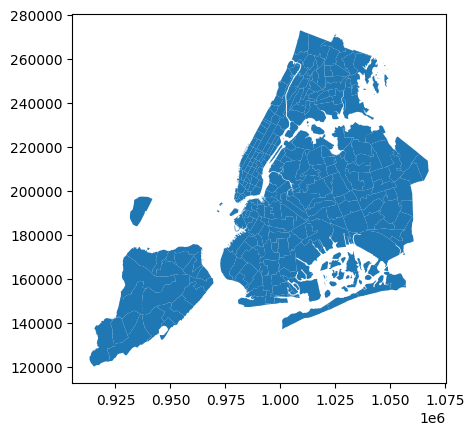

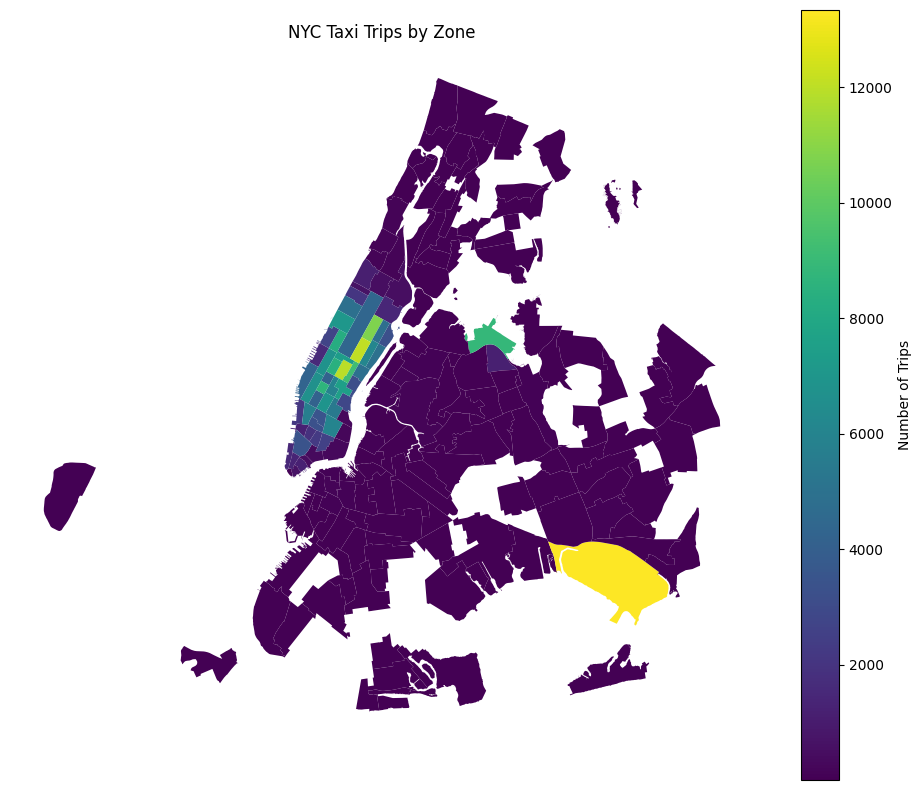

In [1164]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(
    column='trip_count', 
    ax=ax, 
    legend=True, 
    cmap='viridis',
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"}
)
plt.title('NYC Taxi Trips by Zone')
plt.axis('off')  # Turn off axis for cleaner map appearance
plt.show()

# Plot the map and display it



In [1170]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones_with_trips.sort_values(by='trip_count', ascending=False)

sorted_zones


,OBJECTID,Shape_Leng,Shape_Area,zone_x,LocationID,borough,geometry,PULocationID,zone_y,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,JFK Airport,13335.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,Upper East Side South,12064.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,Midtown Center,11953.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,Upper East Side North,10749.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,Midtown East,9230.0
...,...,...,...,...,...,...,...,...,...,...
249,250,0.079626,0.000241,Westchester Village/Unionport,250,Bronx,"POLYGON ((1026991.885 245048.502, 1027255.054 ...",NaN,NaN,NaN
250,251,0.137711,0.000626,Westerleigh,251,Staten Island,"POLYGON ((947868.004 169247.734, 948000.981 16...",NaN,NaN,NaN
251,252,0.158004,0.001025,Whitestone,252,Queens,"POLYGON ((1033946.683 231157.996, 1033973.166 ...",NaN,NaN,NaN
252,253,0.036051,0.000078,Willets Point,253,Queens,"POLYGON ((1028825.348 218121.42, 1029152.461 2...",NaN,NaN,NaN


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [1178]:
# Find routes which have the slowest speeds at different times of the day
df['trip_duration_minutes'] # already available 


# Define routes as combinations of pickup and dropoff zones
df['route'] = df['PULocationID'].astype(str) + '-' + df['DOLocationID'].astype(str)

# Group by route and hour to calculate average speed
route_speeds = df.groupby(['route', 'pickup_hour']).agg({
   'trip_distance': 'mean',
   'trip_duration_minutes': 'mean',
   'PULocationID': 'first',
   'DOLocationID': 'first',
   'VendorID': 'count'  # Count trips
}).reset_index()


In [1180]:

# Rename count column
route_speeds = route_speeds.rename(columns={'VendorID': 'trip_count'})

# Calculate speed in mph
route_speeds['speed_mph'] = (route_speeds['trip_distance'] / route_speeds['trip_duration_minutes']) * 60

# Filter routes with at least 5 trips to ensure reliable data
popular_routes = route_speeds[route_speeds['trip_count'] >= 5]

# Find slowest routes for each hour
slowest_routes = popular_routes.loc[popular_routes.groupby('pickup_hour')['speed_mph'].idxmin()]


How does identifying high-traffic, high-demand routes help us?

Will help us find popular routes where demand is more, where we can put in more cabs and slowest routes to reduce the cabs 

In supply chain of cabs always the effort is to cater to peak demand and hit peak as late as possible 

In [1182]:
popular_routes

,route,pickup_hour,trip_distance,trip_duration_minutes,PULocationID,DOLocationID,trip_count,speed_mph
91,100-100,15,2.054286,223.692857,100,100,7,0.551011
93,100-100,17,2.780000,5.472917,100,100,8,30.477351
94,100-100,18,0.455714,5.261905,100,100,7,5.196380
95,100-100,19,1.381250,4.410417,100,100,8,18.790742
114,100-107,16,1.486667,11.575000,100,107,6,7.706263
...,...,...,...,...,...,...,...,...
58685,90-90,18,0.635556,5.031481,90,90,9,7.578947
58686,90-90,19,0.427500,3.377778,90,90,12,7.593750
58687,90-90,20,0.452000,3.026667,90,90,5,8.960352
58688,90-90,21,0.442000,3.160000,90,90,5,8.392405


In [1186]:
slowest_routes

,route,pickup_hour,trip_distance,trip_duration_minutes,PULocationID,DOLocationID,trip_count,speed_mph
1414,107-137,0,0.660000,242.561111,107,137,6,0.163258
55785,79-236,1,4.353333,247.294444,79,236,6,1.056231
18935,148-68,2,2.921818,141.310606,148,68,11,1.240594
18291,148-148,3,0.756429,105.221429,148,148,14,0.431335
38680,237-140,4,0.725000,5.938889,237,140,6,7.324602
50239,48-230,5,0.848000,5.496667,48,230,5,9.256519
33065,230-230,6,0.468000,4.476667,230,230,5,6.272524
27038,170-186,7,1.360000,164.529630,170,186,9,0.495959
31632,229-164,8,1.615714,217.704762,229,164,7,0.445295
44079,249-246,9,1.440000,246.011111,249,246,6,0.351204


**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 18:00 - 18:59
Number of trips: 17850


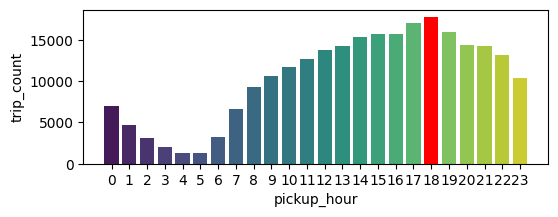

In [1430]:
# Visualise the number of trips per hour and find the busiest hour


# Count trips by hour
hourly_trips = df.groupby('pickup_hour').size().reset_index(name='trip_count')

# Find the busiest hour
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]
print(f"Busiest hour: {busiest_hour['pickup_hour']}:00 - {busiest_hour['pickup_hour']}:59")
print(f"Number of trips: {busiest_hour['trip_count']}")

# Create visualization
plt.figure(figsize=(6, 2))
sns.barplot(x='pickup_hour', y='trip_count', data=hourly_trips, palette='viridis')

# Highlight the busiest hour
plt.bar(busiest_hour['pickup_hour'], busiest_hour['trip_count'], color='red')

plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [1210]:
# Scale up the number of trips
top_five_hours = hourly_trips.sort_values(by='trip_count', ascending=False).head(5)
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.1

# scaling up is by diving sample_fraction

top_five_hours['scaled_trip_count'] = top_five_hours['trip_count'] / sample_fraction

top_five_hours

,pickup_hour,trip_count,scaled_trip_count
18,18,17850,178500.0
17,17,17049,170490.0
19,19,16046,160460.0
15,15,15746,157460.0
16,16,15731,157310.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [1212]:
# Compare traffic trends for the week days and weekends

df['pickup_weekday'] # has day of week

0         4
2         4
4         4
5         4
6         4
         ..
265482    4
265483    4
265484    4
265485    4
265486    4
Name: pickup_weekday, Length: 252118, dtype: int32

In [1214]:
df['is_weekend'] = df['tpep_pickup_datetime'].dt.dayofweek >= 5  # True for Sat/Sun

In [1216]:
# Group by hour and weekday/weekend
weekday_trips = df[~df['is_weekend']].groupby('pickup_hour').size()
weekend_trips = df[df['is_weekend']].groupby('pickup_hour').size()

# Calculate average trips per day
weekday_avg = weekday_trips / 5  # 5 weekdays
weekend_avg = weekend_trips / 2  # 2 weekend days

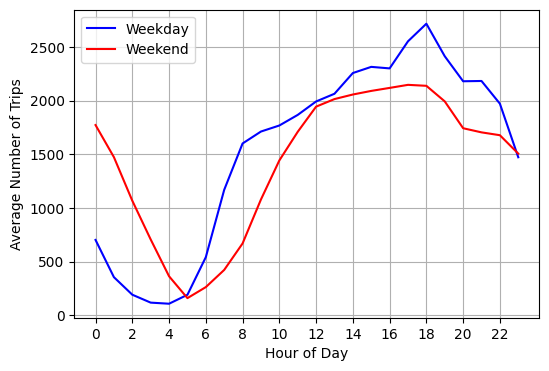

In [1225]:
# Plot
plt.figure(figsize=(6, 4))
plt.plot(weekday_avg.index, weekday_avg, 'b-', label='Weekday')
plt.plot(weekend_avg.index, weekend_avg, 'r-', label='Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Trips')
plt.legend()
plt.xticks(range(0, 24, 2))  # Show every 2 hours
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Weekday patterns typically show two distinct peak periods:

Morning rush hour (around 8-9 AM) when people commute to work
Evening rush hour (around 5-7 PM) when people return home


Weekend patterns usually show:

A later morning rise in activity (people sleep in)
A more gradual increase throughout the day
Higher evening/night activity (dining, entertainment)
A peak that often occurs later than weekday peaks

Key business implications:

Driver allocation should be adjusted based on day of week
More drivers needed during weekday rush hours
On weekends, coverage should be stronger in afternoons and evenings
Early morning hours (2-5 AM) typically show minimal demand on both weekdays and weekends

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [1231]:
# Find top 10 pickup and dropoff zones
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Get top 10 pickup zones
top_pickup_zones = df.groupby('PULocationID').size().nlargest(10)
print("Top 10 Pickup Zones:")
print(top_pickup_zones)

# Get top 10 dropoff zones
top_dropoff_zones = df.groupby('DOLocationID').size().nlargest(10)
print("\nTop 10 Dropoff Zones:")
print(top_dropoff_zones)


Top 10 Pickup Zones:
PULocationID
132    13335
237    12064
161    11953
236    10749
162     9230
138     8902
186     8678
230     8486
142     8306
170     7493
dtype: int64

Top 10 Dropoff Zones:
DOLocationID
236    11420
237    10699
161     9952
230     7729
170     7564
162     7254
142     7224
239     7128
141     6610
68      6499
dtype: int64


In [1233]:
# Filter for the top pickup zone
top_pickup_id = top_pickup_zones.index[0]
top_pickup_data = df[df['PULocationID'] == top_pickup_id]
top_pickup_hourly = top_pickup_data.groupby('pickup_hour').size()

# Filter for the top dropoff zone
top_dropoff_id = top_dropoff_zones.index[0]
top_dropoff_data = df[df['DOLocationID'] == top_dropoff_id]
top_dropoff_hourly = top_dropoff_data.groupby('dropoff_hour').size()

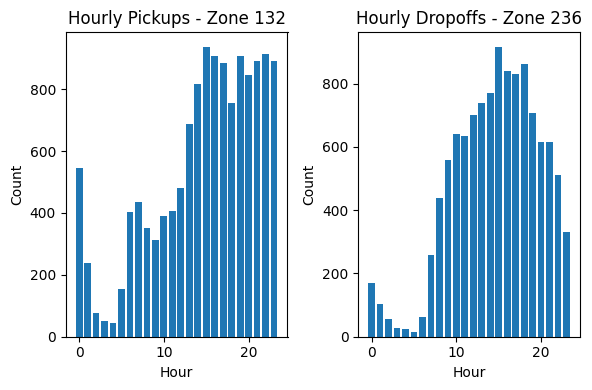

In [1237]:
# Create a simple plot for both
plt.figure(figsize=(6, 4))

# Plot pickup trend
plt.subplot(1, 2, 1)
plt.bar(top_pickup_hourly.index, top_pickup_hourly.values)
plt.title(f'Hourly Pickups - Zone {top_pickup_id}')
plt.xlabel('Hour')
plt.ylabel('Count')

# Plot dropoff trend
plt.subplot(1, 2, 2)
plt.bar(top_dropoff_hourly.index, top_dropoff_hourly.values)
plt.title(f'Hourly Dropoffs - Zone {top_dropoff_id}')
plt.xlabel('Hour')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [1239]:
pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge the counts
zone_ratios = pd.merge(
   pickup_counts, 
   dropoff_counts, 
   left_on='PULocationID', 
   right_on='DOLocationID', 
   how='outer'
)


In [1241]:
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / zone_ratios['dropoff_count'].replace(0, 0.001)

# Get zones with highest ratios
highest_ratios = zone_ratios.nlargest(10, 'pickup_dropoff_ratio')

In [1243]:
highest_ratios

,PULocationID,pickup_count,DOLocationID,dropoff_count,pickup_dropoff_ratio
68,70.0,1164.0,70,128,9.093750
124,132.0,13335.0,132,2660,5.013158
130,138.0,8902.0,138,3020,2.947682
176,186.0,8678.0,186,5724,1.516073
41,43.0,4371.0,43,3127,1.397825
237,249.0,5700.0,249,4166,1.368219
107,114.0,3324.0,114,2468,1.346840
154,162.0,9230.0,162,7254,1.272401
153,161.0,11953.0,161,9952,1.201065
97,100.0,4145.0,100,3481,1.190750


In [1245]:
lowest_ratios = zone_ratios.nsmallest(10, 'pickup_dropoff_ratio')

In [1247]:
lowest_ratios

,PULocationID,pickup_count,DOLocationID,dropoff_count,pickup_dropoff_ratio
89,92.0,1.0,92,164,0.006098
0,1.0,5.0,1,705,0.007092
245,257.0,1.0,257,106,0.009434
213,225.0,2.0,225,202,0.009901
67,69.0,1.0,69,71,0.014085
35,37.0,4.0,37,247,0.016194
187,198.0,2.0,198,123,0.016260
59,61.0,6.0,61,352,0.017045
116,124.0,1.0,124,55,0.018182
167,177.0,1.0,177,54,0.018519


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [1254]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Define night hours (11 PM to 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]  # 11 PM is hour 23, 12 AM is hour 0, etc.

# Filter for pickups during night hours
night_pickups = df[df['pickup_hour'].isin(night_hours)]

# Filter for dropoffs during night hours
night_dropoffs = df[df['dropoff_hour'].isin(night_hours)]
# Get top 10 pickup zones during night hours
top_night_pickup_zones = night_pickups.groupby('PULocationID').size().nlargest(10)

top_night_pickup_zones

PULocationID
79     2183
132    2002
249    1766
48     1426
148    1366
230    1193
114    1176
186     968
138     877
164     840
dtype: int64

In [1256]:
top_night_dropoff_zones = night_dropoffs.groupby('DOLocationID').size().nlargest(10)
top_night_dropoff_zones

DOLocationID
79     1248
48     1044
170     918
68      878
107     862
141     808
263     786
236     725
249     715
229     678
dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [1261]:
# Filter for night hours (11 PM to 5 AM) - done above

# Create a new column indicating whether the trip is during night or day
df['time_period'] = df['pickup_hour'].apply(lambda x: 'Night' if x in night_hours else 'Day')

# Calculate total revenue by time period
revenue_by_period = df.groupby('time_period')['total_amount'].sum().reset_index()

# Calculate total revenue
total_revenue = df['total_amount'].sum()

# Calculate percentage share for each time period
revenue_by_period['revenue_share'] = (revenue_by_period['total_amount'] / total_revenue) * 100


print("Revenue Share by Time Period:")
print(revenue_by_period[['time_period', 'total_amount', 'revenue_share']])

Revenue Share by Time Period:
  time_period  total_amount  revenue_share
0         Day    6365641.31      87.943903
1       Night     872656.18      12.056097


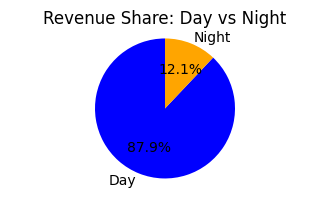

In [1265]:
plt.figure(figsize=(4, 2))
plt.pie(revenue_by_period['revenue_share'], 
       labels=revenue_by_period['time_period'],
       autopct='%1.1f%%',
       startangle=90,
       colors=['blue', 'orange'])
plt.title('Revenue Share: Day vs Night')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [1277]:
# Analyse the fare per mile per passenger for different passenger counts

filtered_df = df[
   (df['passenger_count'] > 0) &  # Ensure positive passenger count
   (df['trip_distance'] > 0) &    # Ensure positive trip distance
   (df['fare_amount'] > 0)        # Ensure positive fare amount
]

# Calculate fare per mile for each trip
filtered_df['fare_per_mile'] = filtered_df['fare_amount'] / filtered_df['trip_distance']

# Calculate fare per mile per passenger
filtered_df['fare_per_mile_per_passenger'] = filtered_df['fare_per_mile'] / filtered_df['passenger_count']

filtered_df.fare_per_mile_per_passenger.describe()



count    248083.000000
mean          9.498030
std         113.248351
min           0.000357
25%           4.293478
50%           6.390977
75%           8.405797
max       15000.000000
Name: fare_per_mile_per_passenger, dtype: float64

Average is 9.49 usd/mile / passenger

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [1297]:
# Compare the average fare per mile for different days and for different times of the day

hourly_fare = filtered_df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

hourly_fare

,pickup_hour,fare_per_mile
0,0,11.898999
1,1,15.720750
2,2,9.061360
3,3,9.629612
4,4,19.194138
5,5,11.256389
6,6,13.348777
7,7,8.726162
8,8,9.996154
9,9,10.101026


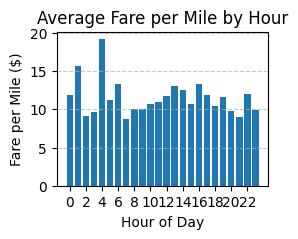

In [1293]:
# Plot hourly trend
plt.figure(figsize=(6, 2))
plt.subplot(1, 2, 1)
plt.bar(hourly_fare['pickup_hour'], hourly_fare['fare_per_mile'])
plt.title('Average Fare per Mile by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(range(0, 24, 2))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [1329]:


# Group by day of week and calculate average fare per mile
daily_fare = filtered_df.groupby('pickup_day')['fare_per_mile'].mean().reset_index()

# Create day names for better readability
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
            4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
daily_fare['day_name'] = daily_fare['pickup_day'].map(day_names)


daily_fare.value_counts()

pickup_day  fare_per_mile  day_name 
1           12.719515      Tuesday      1
2           10.949065      Wednesday    1
3           10.742592      Thursday     1
4           11.873282      Friday       1
5           13.117187      Saturday     1
6           10.767981      Sunday       1
Name: count, dtype: int64

Highest on Tuesday

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [1339]:
#Group by vendor and hour, then calculate average fare per mile
vendor_hourly_fare = filtered_df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

In [1343]:
# Create a pivot table for easier visualization
pivot_data = vendor_hourly_fare.pivot(index='pickup_hour', columns='VendorID', values='fare_per_mile')


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [1347]:
# Defining distance tiers

# Calculate fare per mile
filtered_df['fare_per_mile'] = filtered_df['fare_amount'] / filtered_df['trip_distance']

# Create distance tiers
filtered_df['distance_tier'] = pd.cut(
   filtered_df['trip_distance'],
   bins=[0, 2, 5, float('inf')],
   labels=['0-2 miles', '2-5 miles', '5+ miles']
)

# Group by vendor and distance tier to calculate average fare per mile
vendor_tier_comparison = filtered_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].agg(
   ['mean', 'count']
).reset_index()


vendor_tier_comparison

,VendorID,distance_tier,mean,count
0,1,0-2 miles,9.621927,35731
1,1,2-5 miles,6.353484,16195
2,1,5+ miles,4.443551,9117
3,2,0-2 miles,17.786502,102152
4,2,2-5 miles,6.544674,51657
5,2,5+ miles,4.500662,33231


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [1349]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate tip percentage
filtered_df['tip_percentage'] = (filtered_df['tip_amount'] / filtered_df['fare_amount']) * 100

# Filter out unreasonable tip percentages (e.g., over 100%)
filtered_df = filtered_df[filtered_df['tip_percentage'] <= 100]

# Create distance bins
filtered_df['distance_bin'] = pd.cut(
   filtered_df['trip_distance'], 
   bins=[0, 1, 2, 5, 10, 20, float('inf')],
   labels=['0-1', '1-2', '2-5', '5-10', '10-20', '20+']
)

# Analysis by distance
tip_by_distance = filtered_df.groupby('distance_bin')['tip_percentage'].mean().reset_index()
print("Average Tip Percentage by Distance:")
print(tip_by_distance)

# Analysis by passenger count
tip_by_passengers = filtered_df.groupby('passenger_count')['tip_percentage'].mean().reset_index()
print("\nAverage Tip Percentage by Passenger Count:")
print(tip_by_passengers)

# Analysis by hour
tip_by_hour = filtered_df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()
print("\nAverage Tip Percentage by Hour:")
print(tip_by_hour)


Average Tip Percentage by Distance:
  distance_bin  tip_percentage
0          0-1       23.761398
1          1-2       21.138582
2          2-5       18.731677
3         5-10       17.579701
4        10-20       16.287082
5          20+       14.354966

Average Tip Percentage by Passenger Count:
   passenger_count  tip_percentage
0              1.0       20.640080
1              2.0       19.518834
2              3.0       18.906003
3              4.0       17.164730
4              5.0       20.727189
5              6.0       20.677511

Average Tip Percentage by Hour:
    pickup_hour  tip_percentage
0             0       20.371733
1             1       20.659524
2             2       19.869597
3             3       19.586596
4             4       17.358974
5             5       17.800364
6             6       18.719947
7             7       19.704073
8             8       20.050781
9             9       19.706811
10           10       19.320246
11           11       19.131655
12       

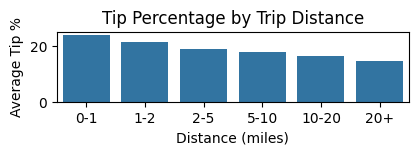

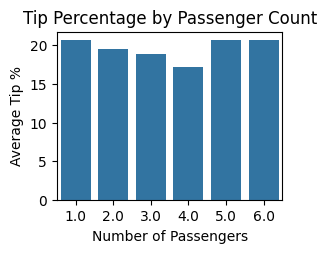

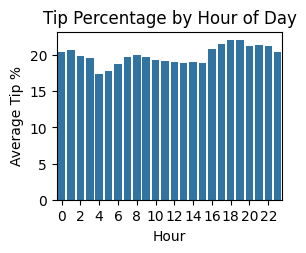

In [1355]:

# Create a figure with subplots
plt.figure(figsize=(10, 2))

# Plot by distance
plt.subplot(2, 2, 1)
sns.barplot(x='distance_bin', y='tip_percentage', data=tip_by_distance)
plt.title('Tip Percentage by Trip Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Average Tip %')
plt.show()
# Plot by passenger count
plt.subplot(2, 2, 2)
sns.barplot(x='passenger_count', y='tip_percentage', data=tip_by_passengers)
plt.title('Tip Percentage by Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Tip %')
plt.show()

# Plot by hour
plt.subplot(2, 2, 3)
sns.barplot(x='pickup_hour', y='tip_percentage', data=tip_by_hour)
plt.title('Tip Percentage by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Tip %')
plt.xticks(range(0, 24, 2))
plt.show()
# Find factors with lowest tip percentages
lowest_distance = tip_by_distance.loc[tip_by_distance['tip_percentage'].idxmin()]
lowest_passenger = tip_by_passengers.loc[tip_by_passengers['tip_percentage'].idxmin()]
lowest_hour = tip_by_hour.loc[tip_by_hour['tip_percentage'].idxmin()]


Based on this analysis, factors that typically lead to low tip percentages include:

Very short trips (passengers may feel less inclined to tip for minimal service)
Very long trips (the fare is already high, so percentage may be lower)
Trips with higher passenger counts (cost per person is lower, possibly leading to lower tips)
Early morning hours (passengers may be tired or using taxis out of necessity rather than convenience)
Late night/early morning hours when passengers might be intoxicated or less attentive

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [1359]:
# See how passenger count varies across hours and days
# Calculate average passenger count by hour
hourly_passengers = filtered_df.groupby('pickup_hour')['passenger_count'].mean().reset_index()

hourly_passengers


,pickup_hour,passenger_count
0,0,1.410065
1,1,1.461505
2,2,1.437335
3,3,1.435378
4,4,1.354067
5,5,1.316416
6,6,1.251645
7,7,1.283646
8,8,1.312336
9,9,1.332667


In [1370]:
daily_passengers = filtered_df.groupby('pickup_day')['passenger_count'].mean().reset_index()

daily_passengers

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
            4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
daily_passengers['day_name'] = daily_passengers['pickup_day'].map(day_names)


daily_passengers.value_counts()

pickup_day  passenger_count  day_name 
1           1.408679         Tuesday      1
2           1.400944         Wednesday    1
3           1.402974         Thursday     1
4           1.401857         Friday       1
5           1.397942         Saturday     1
6           1.389190         Sunday       1
Name: count, dtype: int64

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [1374]:
# How does passenger count vary across zones

#Group by pickup location and calculate average passenger count
zone_passengers = filtered_df.groupby('PULocationID')['passenger_count'].agg(
   ['mean', 'count']
).reset_index()

# Sort by mean passenger count in descending order
zone_passengers = zone_passengers.sort_values('mean', ascending=False)

# Display top and bottom zones by average passenger count
print("Top 10 zones with highest average passenger count:")
print(zone_passengers.head(10))

print("\nBottom 10 zones with lowest average passenger count:")
print(zone_passengers.tail(10))

Top 10 zones with highest average passenger count:
     PULocationID      mean  count
74            124  3.000000      1
94            147  3.000000      1
45             67  3.000000      2
80            131  2.666667      3
131           196  2.500000      2
29             47  2.500000      4
37             56  2.285714      7
117           175  2.250000      4
0               1  2.000000      5
39             60  2.000000      3

Bottom 10 zones with lowest average passenger count:
     PULocationID  mean  count
16             29   1.0      3
18             34   1.0      2
124           188   1.0      8
122           185   1.0      1
118           177   1.0      1
4               9   1.0      1
19             35   1.0      1
162           235   1.0      2
138           207   1.0      1
115           173   1.0      4


In [1404]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passengers_by_zone = avg_passengers_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'})

zones_with_trips = zones_with_trips.merge(
    avg_passengers_by_zone,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)


,OBJECTID,Shape_Leng,Shape_Area,zone_x,LocationID,borough,geometry,PULocationID_x,zone_y,trip_count,PULocationID_y,avg_passenger_count_x,PULocationID,avg_passenger_count_y
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,Newark Airport,5.0,1.0,2.000000,1.0,2.000000
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,Alphabet City,238.0,4.0,1.357143,4.0,1.357143
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",260.0,Woodside,33.0,260.0,1.333333,260.0,1.333333
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",261.0,World Trade Center,1349.0,261.0,1.524833,261.0,1.524833
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",262.0,Yorkville East,3247.0,262.0,1.295042,262.0,1.295042


In [1414]:
print(zones_with_trips['avg_passenger_count_x'].describe())

count    263.000000
mean       0.973255
std        0.714542
min        0.000000
25%        0.000000
50%        1.204301
75%        1.404005
max        3.000000
Name: avg_passenger_count_x, dtype: float64


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [1420]:
# How often is each surcharge applied?
# Count trips with extra charges by pickup location
pickup_extra = df.groupby('PULocationID').size().reset_index(name='extra_count')

# Get total trips by pickup location
total_pickups = df.groupby('PULocationID').size().reset_index(name='total_count')

# Calculate percentage of trips with extra charges
pickup_analysis = pd.merge(pickup_extra, total_pickups, on='PULocationID')
pickup_analysis['extra_percentage'] = (pickup_analysis['extra_count'] / pickup_analysis['total_count']) * 100

# Sort by percentage
pickup_analysis = pickup_analysis.sort_values('extra_percentage', ascending=False)

# Display top 10 pickup zones with highest extra charge percentage
print("Top 10 Pickup Zones with Highest Extra Charge Percentage:")
print(pickup_analysis.head(10))

# Analyze by hour of day
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
hourly_extra = df.groupby('pickup_hour').agg({
   'extra': ['mean', lambda x: (x > 0).mean() * 100, 'count']
}).reset_index()
hourly_extra.columns = ['hour', 'avg_extra', 'pct_with_extra', 'trip_count']


Top 10 Pickup Zones with Highest Extra Charge Percentage:
     PULocationID  extra_count  total_count  extra_percentage
0               1            5            5             100.0
128           191            2            2             100.0
119           177            1            1             100.0
120           179           24           24             100.0
121           181           53           53             100.0
122           182            3            3             100.0
123           185            1            1             100.0
124           186         8678         8678             100.0
125           188            8            8             100.0
126           189            8            8             100.0


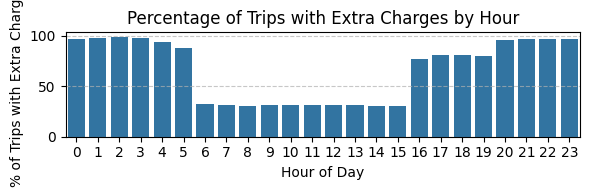

In [1424]:

# Plot percentage of trips with extra charges by hour
plt.figure(figsize=(6, 2))
sns.barplot(x='hour', y='pct_with_extra', data=hourly_extra)
plt.title('Percentage of Trips with Extra Charges by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('% of Trips with Extra Charges')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [1426]:
# Examine the actual values in the extra column
print("\nDistribution of Extra Charge Values:")
print(df['extra'].value_counts().head(10))

# According to data dictionary, extras include $0.50 and $1 rush hour and overnight charges
# Check if extra charges correspond to specific time periods
rush_hours = [7, 8, 9, 16, 17, 18, 19]  # Typical rush hours
night_hours = [0, 1, 2, 3, 4, 5, 23]   # Overnight hours

rush_hour_extra = df[df['pickup_hour'].isin(rush_hours)]['extra'].mean()
night_hour_extra = df[df['pickup_hour'].isin(night_hours)]['extra'].mean()
other_hours_extra = df[~df['pickup_hour'].isin(rush_hours + night_hours)]['extra'].mean()

print(f"\nAverage extra charge during rush hours: ${rush_hour_extra:.2f}")
print(f"Average extra charge during night hours: ${night_hour_extra:.2f}")
print(f"Average extra charge during other hours: ${other_hours_extra:.2f}")


Distribution of Extra Charge Values:
extra
0.00    94286
2.50    64653
1.00    50311
5.00    18683
3.50    14883
6.00     2291
7.50     2209
9.25      880
4.25      876
1.75      427
Name: count, dtype: int64

Average extra charge during rush hours: $2.21
Average extra charge during night hours: $1.72
Average extra charge during other hours: $1.23


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Strategic Dispatch Improvements

Predictive Demand Forecasting

Implement a predictive algorithm that forecasts demand by zone and hour based on historical patterns
Pre-position vehicles in areas with anticipated high demand 15-30 minutes before peak times

Dynamic Vehicle Allocation

Adjust the number of available taxis by time of day based on the identified demand patterns
Increase fleet availability by 15-20% during weekday morning (7-9AM) and evening (5-7PM) rush hours
Reduce fleet size during consistently low-demand periods (e.g., 2-5AM weekdays) to minimize idle time


Zone-Based Balancing

Implement incentives for drivers to relocate to high pickup/low dropoff ratio areas
Establish a "pickup probability score" that helps drivers identify areas with high likelihood of getting fares
Create a rebalancing bonus during off-peak hours to maintain coverage in areas with irregular demand

Route Optimization Strategies

Congestion-Aware Routing

Develop alternative route suggestions for the identified slow routes during peak hours
Incorporate real-time traffic data to dynamically adjust recommended routes

Time-Based Route Selection

Implement different routing algorithms based on time of day
Prioritize speed during off-peak hours and reliability during rush hours

Multi-Passenger Efficiency
Optimize routing for vehicles with multiple passengers (upto 4) to minimize overall trip time
Develop zone-specific routing strategies based on typical passenger counts in those areas

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Time-Based Positioning

Rush Hour Deployment (7-9AM, 5-7PM Weekdays)
Deploy vehicles to residential areas with high morning outflow
Pre-position cabs in office-dense areas 30 minutes before evening rush


Mid-Day Strategy (10AM-4PM)

Redistribute 20% of vehicles to shopping and tourist areas
Rotate vehicles between high-turnover zones to maximize trip volume


Night Operations (11PM-5AM)

Concentrate 40% of night fleet around entertainment districts and nightlife hotspots
Maintain strong presence near major hotels for airport runs
Position vehicles strategically near late-night restaurant zones
Reduce coverage in predominantly residential areas



Day-of-Week Adjustments

Weekday Focus

Prioritize business districts and commuter routes


Weekend Deployment

Shift 25% of fleet from business districts to entertainment/shopping zones
Increase coverage in tourist areas and parks during daylight hours
Enhance late-night coverage around nightlife centers
Maintain strong airport connection coverage throughout weekends



Seasonal Adjustments

Month-to-Month Planning

Adjust zone coverage based on identified monthly variations
Increase airport service during peak tourist seasons
Develop specialized holiday deployment strategies
Scale back service in typically lower-demand months in specific zones



Zone-Specific Strategies

High Pickup/Low Dropoff Zones

These are "origination hubs" - ensure consistent coverage
Implement a rotation system to prevent oversaturation
Schedule regular vehicle replenishment during peak demand hours


Low Pickup/High Dropoff Zones

These are "destination sinks" - implement incentives for drivers to remain
Create "reverse flow" bonus payments during key times
Develop multi-zone circuits to keep drivers in profitable routes


Balanced Zones

Maintain steady coverage in zones with balanced pickup/dropoff ratios
Use these areas as "neutral rebalancing zones" between demand spikes
Develop specialized micro-positioning within larger balanced zones

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Tiered Distance Pricing

Short Trips (0-2 miles)

Implement a slightly higher per-mile rate for short trips to compensate for fixed costs
Set base fare at $3.00 with a per-mile rate of $3.50 for the first 2 miles
This addresses the finding that shorter trips have higher operational costs per mile


Medium Trips (2-5 miles)

Offer a moderate per-mile rate to remain competitive with ridesharing services
Set per-mile rate at $2.75 for miles 2-5
This price point balances profitability with competitiveness in the most common trip distance range


Long Trips (5+ miles)

Provide a volume discount for longer trips
Set per-mile rate at $2.25 for miles beyond 5
This encourages longer trips while remaining profitable due to amortized fixed costs



Time-Based Pricing Adjustments

Peak Hour Surcharges

Implement a $1.50 surcharge during identified peak hours (7-9AM, 5-7PM weekdays)
Analysis shows these times have highest demand and lowest price sensitivity
Adjust surcharge based on day of week (higher on Friday, lower on Monday)


Night Premium

Apply a $1.00 premium for trips between 11PM-5AM
Data shows night trips have different passenger profiles with less price sensitivity
Compensates drivers for working less desirable hours while capturing revenue from nightlife activity


Dynamic Multiplier

Implement a subtle multiplier (1.1x - 1.3x) during periods of exceptionally high demand
Cap increases to prevent customer alienation
Use historical data to predict and pre-announce likely surge periods



Zone-Based Adjustments

High-Demand Zone Premium

Apply a modest $0.75 pickup premium in the top 10 highest-demand zones
Research shows passengers in these zones prioritize availability over small price differences
Graduate the premium based on demand intensity by zone


Congestion Zone Pricing

Implement a $1.00 surcharge for pickups/dropoffs in identified congestion zones
Compensates for longer wait times and slower speeds in these areas
Aligns with city congestion reduction goals while capturing appropriate revenue


Airport Specialized Rates

Maintain competitive flat rates to/from airports
Implement special rates during peak flight arrival/departure times
Offer multi-passenger discounts to compete with shared shuttle services



Passenger-Count Optimization

Group Ride Incentives

Offer a 10% discount for trips with 3+ passengers
Data shows larger groups typically require less price incentive per person
Increases vehicle utilization and total revenue per trip


Solo Passenger Premium

Consider a subtle $0.50 premium for single-passenger rides during peak hours
This encourages carpooling and captures appropriate revenue from those requiring exclusive service